<a href="https://colab.research.google.com/github/seifahmed2004/ML-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [69]:
df = pd.read_csv("/content/mhealth_raw_data.csv")
df


#second way to download the dataset
# !kaggle datasets download -d gaurav2022/mobile-health
# !unzip mobile-health.zip
# df = pd.read_csv('mhealth_raw_data.csv')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
df['subject_encoded'] = le.fit_transform(df['subject'])
df.drop(columns=['subject'], inplace=True)
sample_of_data = df.sample(n=10000, random_state=42)
X = sample_of_data.drop(columns=['Activity'])
y = sample_of_data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

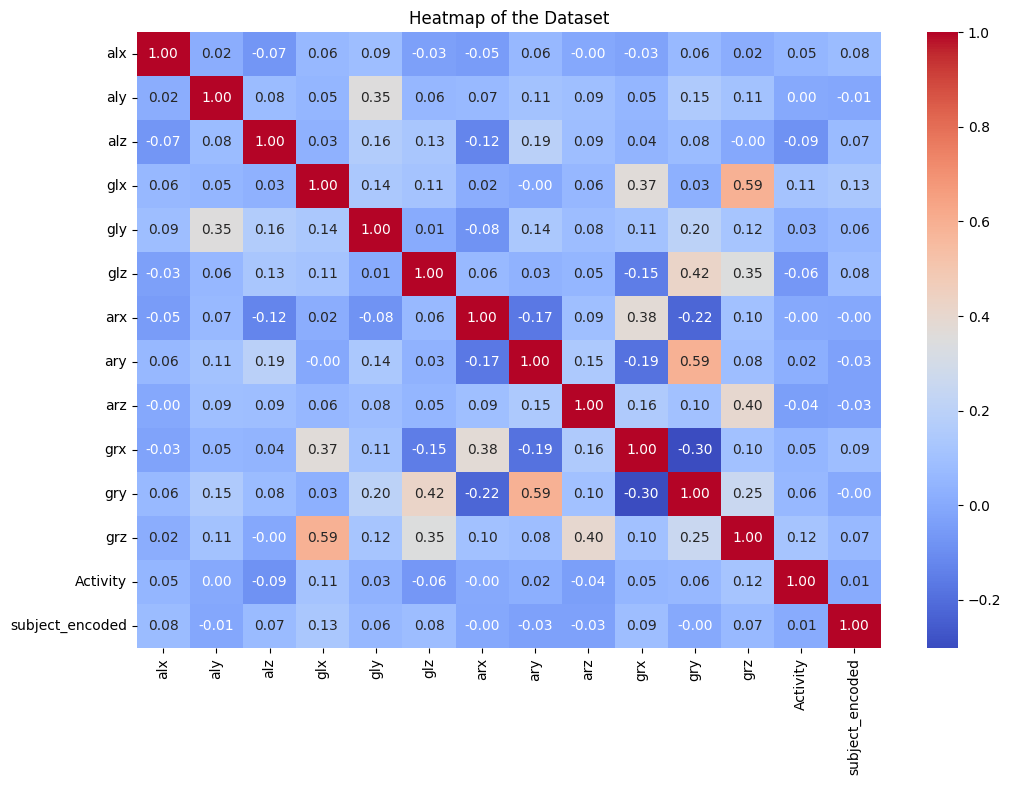

In [71]:
numeric_columns = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of the Dataset')
plt.show()

In [72]:
df_subset = df.sample(n=10000, random_state=42)
df_subset

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject_encoded
637239,4.12310,-8.1374,1.113500,-0.30612,-0.80113,0.57957,1.691100,-5.9107,4.93360,-0.29804,-0.10267,1.084100,0,5
962780,8.64860,-19.1890,3.835400,-0.28757,-0.30019,-1.08450,-5.858700,-12.3920,0.75538,0.56471,-0.91992,0.461210,0,8
834341,0.89757,-9.6380,1.547900,-0.19666,-0.78236,-0.68566,5.240200,-8.7376,3.24020,-0.15294,-1.00620,-0.284480,0,7
627470,0.59739,-5.2040,-1.587600,0.34508,-0.81238,-0.48330,-5.490300,-6.3089,4.11160,-0.77647,0.13347,0.782330,0,5
265172,19.70000,-16.4820,-3.627100,0.55102,-0.54972,0.50884,13.986000,-3.0919,-8.18580,-0.31176,0.19918,1.101300,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250181,2.06420,-9.4952,-0.016619,-0.48794,-0.85553,-0.19646,-6.835200,-4.6860,2.40110,-0.61765,-0.78234,-0.426720,0,2
756424,2.07740,-9.0024,-0.241850,0.76809,-0.56098,-0.37132,-0.909180,-7.5983,2.17220,0.60196,-0.73101,0.536640,0,7
145458,2.13510,-9.9461,-1.538500,-0.40074,-0.83677,-0.47937,-2.697200,-11.1900,0.97174,0.67255,-1.00620,-0.081897,0,0
1192943,0.23551,2.1549,-18.171000,-0.29685,-0.79925,-0.64440,0.196750,-4.2282,0.18443,-0.81176,-0.10472,-0.620690,10,1


<Axes: >

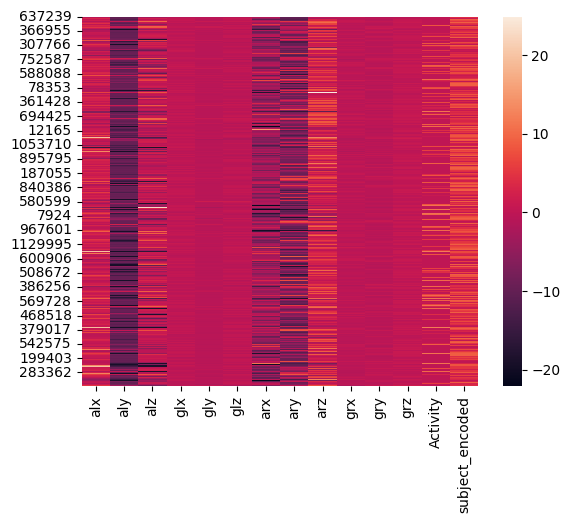

In [73]:
import seaborn as sns
sns.heatmap(df_subset)

Sample data points:
      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity  subject_encoded  
0  0.187760 -0.44902 -1.0103  0.034483         0                0  
1  0.023595 -0.44902 -1.0103  0.034483         0                0  
2  0.275720 -0.44902 -1.0103  0.034483         0                0  
3  0.367520 -0.45686 -1.0082  0.025862         0                0  
4  0.407290 -0.45686 -1.0082  0.025862         0                0  


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


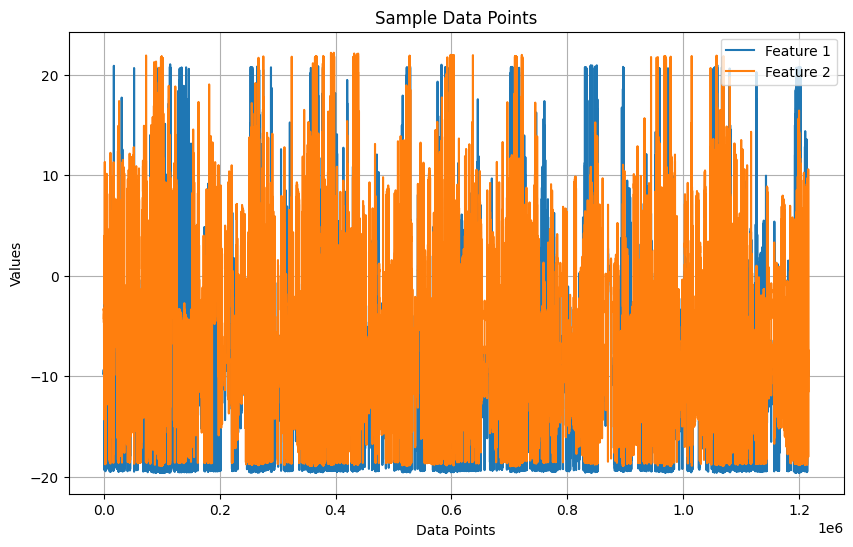

In [74]:
#Visualization of sample data points
print("Sample data points:")
print(df.head())
plt.figure(figsize=(10, 6))

plt.plot(df['aly'], label='Feature 1')
plt.plot(df['ary'], label='Feature 2')

plt.title('Sample Data Points')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
X.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,subject_encoded
637239,4.12310,-8.1374,1.1135,-0.30612,-0.80113,0.57957,1.6911,-5.9107,4.93360,-0.29804,-0.10267,1.08410,5
962780,8.64860,-19.1890,3.8354,-0.28757,-0.30019,-1.08450,-5.8587,-12.3920,0.75538,0.56471,-0.91992,0.46121,8
834341,0.89757,-9.6380,1.5479,-0.19666,-0.78236,-0.68566,5.2402,-8.7376,3.24020,-0.15294,-1.00620,-0.28448,7
627470,0.59739,-5.2040,-1.5876,0.34508,-0.81238,-0.48330,-5.4903,-6.3089,4.11160,-0.77647,0.13347,0.78233,5
265172,19.70000,-16.4820,-3.6271,0.55102,-0.54972,0.50884,13.9860,-3.0919,-8.18580,-0.31176,0.19918,1.10130,2


In [76]:
y.head()

637239     0
962780     0
834341     0
627470     0
265172    11
Name: Activity, dtype: int64

In [77]:
df_no_duplicates = df.drop_duplicates()
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)

Original DataFrame shape: (1215745, 14)
DataFrame shape after removing duplicates: (1215745, 14)


In [78]:
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples ")

training set size: 8000 samples 
test set size: 2000 samples 


In [79]:
from collections import Counter
from sklearn.metrics import accuracy_score

KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, knn_params, cv=5)
grid_search_knn.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [81]:
best_knn = grid_search_knn.best_estimator_
knn_y_pred = best_knn.predict(X_test_normalized)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

In [82]:
print("knn accuracy:", knn_accuracy)

knn accuracy: 0.824


In [84]:
conf_matrix = confusion_matrix(y_test, knn_y_pred)
conf_matrix

array([[1255,   21,   18,   13,   15,    9,   12,   16,   23,   18,   11,
          14,    3],
       [   2,   42,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   5,    0,   50,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4,    0,    0,   52,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  17,    0,    0,    0,   29,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  18,    0,    0,    0,    2,   14,    0,    0,    2,    0,    0,
           0,    0],
       [  18,    1,    0,    0,    0,    0,   32,    0,    2,    0,    0,
           0,    0],
       [  11,    0,    0,    0,    0,    0,    0,   36,    0,    0,    0,
           0,    0],
       [  15,    0,    0,    0,    0,    0,    0,    0,   31,    0,    0,
           0,    0],
       [  20,    0,    0,    0,    0,    0,    0,    0,    0,   23,    0,
           0,    0],
       [  23,    0,    0,    0,    0,    0,    0, 

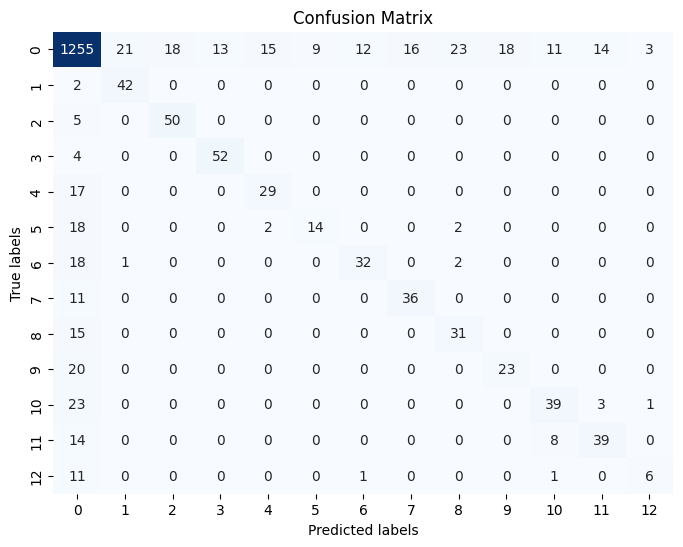

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


SVM

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
y_train = y_train[:10000]
X_train = X_train[:10000]
c_values = [0.1 , 1 , 10]
gamma_values = [0.01 , 0.1 , 1]
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
for gamma in gamma_values:
  for c in c_values:
      svm = SVC(C=c, gamma=gamma)
      svm.fit(X_train, y_train)
      svm_pred = svm.predict(X_test)
      accuracy = accuracy_score(y_test,svm_pred)
      mean_accuracy = np.mean(accuracy)
      std_accuracy = np.std(accuracy)
      print("Gamma:", gamma, "C:", c, "Mean Accuracy:", mean_accuracy, "Std Accuracy:", std_accuracy)


Gamma: 0.01 C: 0.1 Mean Accuracy: 0.7305 Std Accuracy: 0.0
Gamma: 0.01 C: 1 Mean Accuracy: 0.7495 Std Accuracy: 0.0
Gamma: 0.01 C: 10 Mean Accuracy: 0.7705 Std Accuracy: 0.0
Gamma: 0.1 C: 0.1 Mean Accuracy: 0.73 Std Accuracy: 0.0
Gamma: 0.1 C: 1 Mean Accuracy: 0.7665 Std Accuracy: 0.0
Gamma: 0.1 C: 10 Mean Accuracy: 0.7795 Std Accuracy: 0.0
Gamma: 1 C: 0.1 Mean Accuracy: 0.744 Std Accuracy: 0.0
Gamma: 1 C: 1 Mean Accuracy: 0.7665 Std Accuracy: 0.0
Gamma: 1 C: 10 Mean Accuracy: 0.7705 Std Accuracy: 0.0


In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [25]:
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = True, random_state=42)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train)
X_train = X_train.dropna()
y_train = pd.DataFrame(y_train)
y_train = y_train.dropna()

In [28]:
print("SVM accuracy: ",accuracy)

SVM accuracy:  0.7705


NN

In [86]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [101]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(7000, 13) (1500, 13) (1500, 13) (7000,) (1500,) (1500,)


In [119]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam


In [120]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)), #vector
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [121]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [134]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [136]:
from keras import layers

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("Fit model on training data")

Fit model on training data


In [137]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3622 - accuracy: 0.8982 - val_loss: 0.1661 - val_accuracy: 0.9540
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1515 - accuracy: 0.9558 - val_loss: 0.1346 - val_accuracy: 0.9635
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 0.1103 - accuracy: 0.9668 - val_loss: 0.1108 - val_accuracy: 0.9691
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0872 - accuracy: 0.9742 - val_loss: 0.1015 - val_accuracy: 0.9696
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0728 - accuracy: 0.9784 - val_loss: 0.0993 - val_accuracy: 0.9714
Epoch 6/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0607 - accuracy: 0.9809 - val_loss: 0.1005 - val_accuracy: 0.9711
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0980 - val_accuracy: 0.9712
Epoch 

In [138]:
from sklearn.model_selection import train_test_split

# Assuming you have your input data X and target data y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))


Training set shapes - X_train: (8000, 13), y_train: (8000,)
Testing set shapes - X_test: (2000, 13), y_test: (2000,)


In [139]:
X_test_adj = X_test[:5000]
y_test_adj = y_test[:5000]

In [144]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))  # Adjust input shape to (13,)
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# evaluation
evaluation_results = model.evaluate(X_test_adj, y_test_adj)
evaluation_results

63/63 [==============================] - 1s 7ms/step - loss: 2.8034 - accuracy: 0.6885


[2.803410291671753, 0.6884999871253967]

In [141]:
accuracy = evaluation_results[1]

print("NN Accuracy:", accuracy)

NN Accuracy: 0.7055000066757202


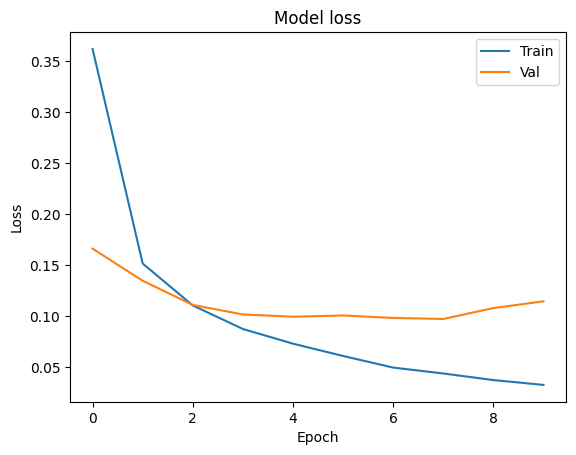

In [142]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

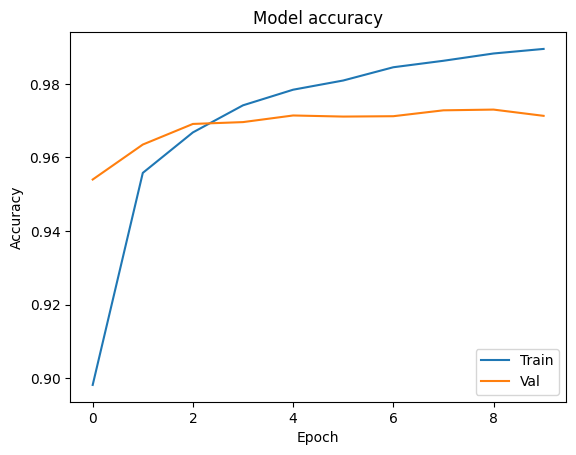

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [145]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)


63/63 [==============================] - 0s 3ms/step


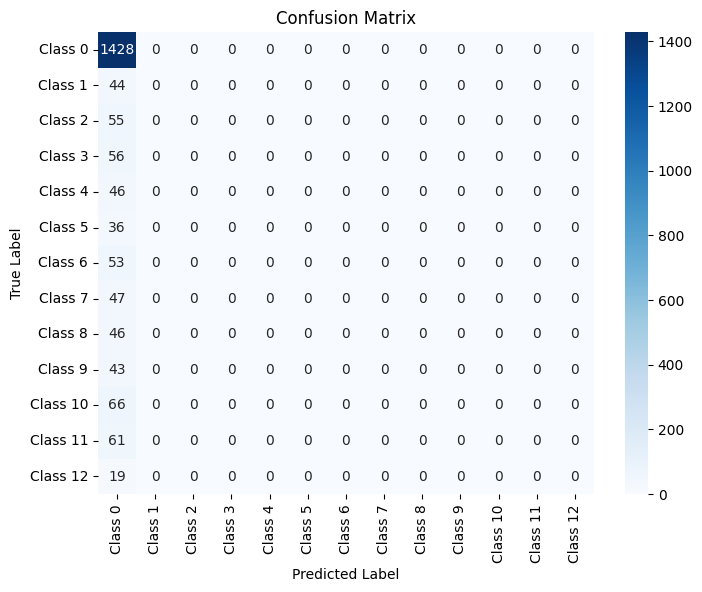

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[1])],
            yticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[0])])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NN

In [44]:
#Define sigmoid function
def sigmoid(z):
    #output > 0.5 when z is positive
    #output < 0.5 when z is negative
    return 1/(1+np.exp(-z)) # Output in range [0,1]

In [45]:
x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

Text(0, 0.5, 'Logistic/sigmoid function applied')

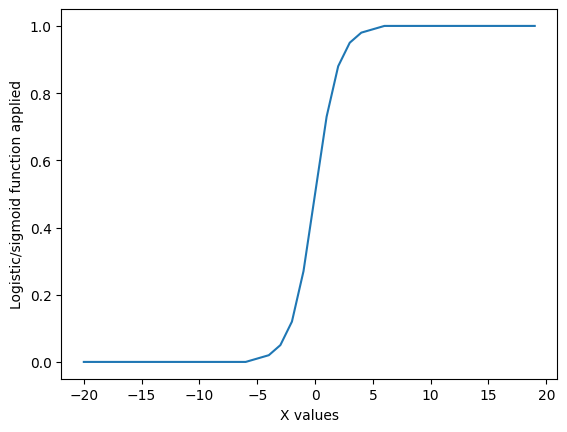

In [46]:
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Logistic/sigmoid function applied')

In [47]:
df.isna().sum()

alx                0
aly                0
alz                0
glx                0
gly                0
glz                0
arx                0
ary                0
arz                0
grx                0
gry                0
grz                0
Activity           0
subject_encoded    0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df['alx'].value_counts()

alx
 19.59600    324
 19.58600    287
 19.57500    209
 19.60600    182
 19.56500     82
            ... 
 7.36230       1
-2.93850       1
-9.24390       1
 0.74650       1
 0.99736       1
Name: count, Length: 320576, dtype: int64

In [50]:
X_train = np.random.rand(100, 13)
y_train = np.random.randint(0, 2, 100)
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred=clf.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y_test = np.random.randint(0, 2, 243149)
print(accuracy_score(y_test,y_pred))

0.49894920398603326


In [53]:
# Convert labels to the same type if necessary
y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

# Now you can calculate the confusion matrix
confusion_matrix(y_test, y_pred)


array([[61974, 60052],
       [61778, 59345]])

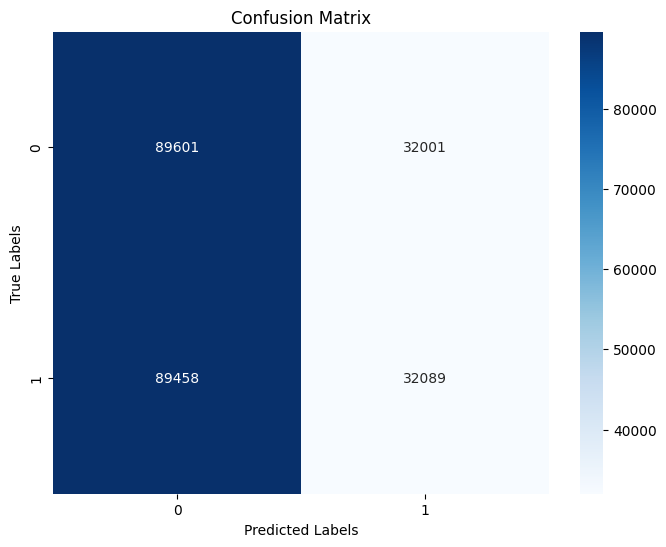

In [87]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Logistic regression


In [55]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


In [56]:
X = df[['aly', 'ary']].values
y = df['Activity'].values

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()

linear_reg.fit(X_train_normalized , y_train)

lin_reg_cv_scores = cross_val_score(linear_reg, X_train_normalized, y_train, cv=5, scoring='neg_mean_squared_error')


lin_reg_y_pred = linear_reg.predict(X_test_normalized)
lin_reg_mse = mean_squared_error(y_test, lin_reg_y_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)


print("Cross Validation Linear Regression Mean Squared Error : ", np.mean(np.abs(lin_reg_cv_scores)))
print("Mean Squared Error (MSE): ", lin_reg_mse)
print("Root Mean Squared Error (RMSE) : ", lin_reg_rmse)

Cross Validation Linear Regression Mean Squared Error :  9.954434884412148
Mean Squared Error (MSE):  11.104400567474094
Root Mean Squared Error (RMSE) :  3.332326599760908


In [149]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm


In [150]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [151]:
auto_data = pd.read_csv('/content/mhealth_raw_data.csv', na_values='?').dropna()
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [152]:
train_df = auto_data.sample(196, random_state = 1) # split the data into two halfs # random_state to get the same result every time
val_df = auto_data[~auto_data.isin(train_df)].dropna(how = 'all')

X_train = train_df['alx'].values.reshape(-1,1)
y_train = train_df['aly']
X_val = val_df['alz'].values.reshape(-1,1)
y_val = val_df['glx']

In [153]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Linear
lm = skl_lm.LinearRegression()

model = lm.fit(X_train, y_train)
print(mean_squared_error(y_val, model.predict(X_val)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_val, model.predict(X_val2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_val3 = poly.fit_transform(X_val)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_val, model.predict(X_val3)))

90.26304073144514
95.51983838745835
105.56308996776153


In [156]:
y_train = y_train.iloc[:8000]
X_train_normalized = X_train_normalized[:len(y_train)]

linear_reg = LinearRegression()
linear_reg.fit(X_train_normalized, y_train)

lin_reg_cv_scores = cross_val_score(linear_reg, X_train_normalized, y_train, cv=5, scoring='neg_mean_squared_error')

lin_reg_y_pred = linear_reg.predict(X_test_normalized)
lin_reg_mse = mean_squared_error(y_test, lin_reg_y_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)

print("Cross Validation Linear Regression Mean Squared")

Cross Validation Linear Regression Mean Squared


In [157]:
train_df = auto_data.sample(196, random_state = 2) # split the data into two halfs # random_state to get the same result every time
val_df = auto_data[~auto_data.isin(train_df)].dropna(how = 'all')

X_train = train_df['alx'].values.reshape(-1,1)
y_train = train_df['aly']
X_val = val_df['alz'].values.reshape(-1,1)
y_val = val_df['glx']

model = lm.fit(X_train, y_train)
print(mean_squared_error(y_val, model.predict(X_val)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_val, model.predict(X_val2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_val3 = poly.fit_transform(X_val)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_val, model.predict(X_val3)))

88.07690244889599
88.7671597647046
104.79548023263176


In [182]:
y_pred_class = [int(round(pred)) for pred in y_pred]
conf_matrix_best = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:")
print(conf_matrix_best)


Confusion Matrix:
[[1377   51    0    0    0    0    0    0    0    0    0    0    0]
 [  44    0    0    0    0    0    0    0    0    0    0    0    0]
 [  55    0    0    0    0    0    0    0    0    0    0    0    0]
 [  26   30    0    0    0    0    0    0    0    0    0    0    0]
 [  44    2    0    0    0    0    0    0    0    0    0    0    0]
 [  35    1    0    0    0    0    0    0    0    0    0    0    0]
 [  53    0    0    0    0    0    0    0    0    0    0    0    0]
 [  47    0    0    0    0    0    0    0    0    0    0    0    0]
 [  46    0    0    0    0    0    0    0    0    0    0    0    0]
 [  42    1    0    0    0    0    0    0    0    0    0    0    0]
 [  57    9    0    0    0    0    0    0    0    0    0    0    0]
 [  46   15    0    0    0    0    0    0    0    0    0    0    0]
 [  16    3    0    0    0    0    0    0    0    0    0    0    0]]


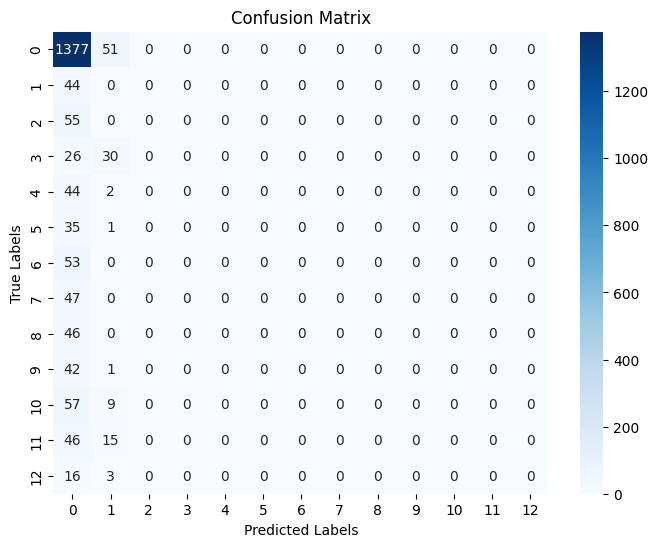

In [183]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [158]:
#Leave-One-Out Cross-Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = auto_data['alx'].values.reshape(-1,1)
y = auto_data['aly'].values.reshape(-1,1)

# making n_splits = # of entries make the cross_val_score use only one entry for testing and the rest for training (LOOCV)
crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

# cross validation scores : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
scores = cross_val_score(lm, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

#print(scores)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Folds: 392, MSE: 17.432586519337843, STD: 22.115207908


In [159]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(lm, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 17.432586519337846, STD: 22.115207908
Degree-2 polynomial MSE: 17.177766424492606, STD: 22.07046840607775
Degree-3 polynomial MSE: 17.118308921171778, STD: 21.62853992554251
Degree-4 polynomial MSE: 17.01429987929573, STD: 21.7886698243346
Degree-5 polynomial MSE: 16.955829641926716, STD: 21.521883691852263


In [176]:
#k-Fold Cross-Validation
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(lm, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 17.454190287110666, STD: 2.9045421687244337
Degree-2 polynomial MSE: 17.19785579362167, STD: 2.86601779822585
Degree-3 polynomial MSE: 17.135252702964, STD: 2.8985007536411573
Degree-4 polynomial MSE: 17.0281241623069, STD: 2.8895979444346014
Degree-5 polynomial MSE: 16.974039412301256, STD: 2.8681185136963765
Degree-6 polynomial MSE: 16.980534218280678, STD: 2.8734262618075084
Degree-7 polynomial MSE: 16.927902958069986, STD: 2.895209724655007
Degree-8 polynomial MSE: 16.90410792347675, STD: 2.8821762198063263
Degree-9 polynomial MSE: 16.78815221452518, STD: 2.852946424753081
Degree-10 polynomial MSE: 16.785641005202294, STD: 2.882124756138064
